# - The content of the notebook : 

**1_ Business Understanding / Problem Statement**

**2_ Data studying**

**3_ Data Collection** 

**4_Data Cleaning**

**5_Data Exploration & Analysis (EDA)**

**6_Data Modelling**


## Step 1 :  Business Understanding / Problem Statement :- 

_Breast cancer (BC) is one of the most common cancers among women worldwide, representing the majority of new cancer cases and cancer-related deaths according to global statistics, making it a significant public health problem in today’s society.

_The early diagnosis of BC can improve the prognosis and chance of survival significantly, as it can promote timely clinical treatment to patients. Further accurate classification of benign tumors can prevent patients undergoing unnecessary treatments. Thus, the correct diagnosis of BC and classification of patients into malignant or benign groups is the subject of much research. Because of its unique advantages in critical features detection from complex BC datasets, machine learning (ML) is widely recognized as the methodology of choice in BC pattern classification and forecast modelling.

_Classification and data mining methods are an effective way to classify data. Especially in medical field, where those methods are widely used in diagnosis and analysis to make decisions.

### Recommended Screening Guidelines:

**_Mammography :** The most important screening test for breast cancer is the mammogram. A mammogram is an X-ray of the breast. It can detect breast cancer up to two years before the tumor can be felt by you or your doctor.

**_Women :** age 40–45 or older who are at average risk of breast cancer should have a mammogram once a year.

**_Women at high risk :** should have yearly mammograms along with an MRI starting at age 30.

### Some Risk Factors for Breast Cancer :-

_ However, most cases of breast cancer cannot be linked to a specific cause. Talk to your doctor about your specific risk.

_**Age :-** The chance of getting breast cancer increases as women age. Nearly 80 percent of breast cancers are found in women over the age of 50.

_**Personal history of breast cancer :-** A woman who has had breast cancer in one breast is at an increased risk of developing cancer in her other breast.

-**Family history of breast cancer:-** A woman has a higher risk of breast cancer if her mother, sister or daughter had breast cancer, especially at a young age (before 40). Having other relatives with breast cancer may also raise the risk.

_**Genetic factors -** Women with certain genetic mutations, including changes to the BRCA1 and BRCA2 genes, are at higher risk of developing breast cancer during their lifetime. Other gene changes may raise breast cancer risk as well.

_**Childbearing and menstrual history :-** The older a woman is when she has her first child, the greater her risk of breast cancer. 

**Also at higher risk are:**

1_Women who menstruate for the first time at an early age (before 12)

2_Women who go through menopause late (after age 55)

3_Women who’ve never had children

### Objectives:

_ This analysis aims to observe which features are most helpful in predicting malignant or benign cancer and to see general trends that may aid us in model selection and hyper parameter selection. The goal is to classify whether the breast cancer is benign or malignant. To achieve this i have used machine learning classification methods to fit a function that can predict the discrete class of new input.

## Step 2 : Data studying :-

1) ID number

2) Diagnosis (M = malignant, B = benign) 3-32)

##### Ten real-valued features are computed for each cell nucleus:

    a) radius (mean of distances from center to points on the perimeter)
    
	b) texture (standard deviation of gray-scale values)
    
	c) perimeter
    
	d) area
    
	e) smoothness (local variation in radius lengths)
    
	f) compactness (perimeter^2 / area - 1.0)
    
	g) concavity (severity of concave portions of the contour)
    
	h) concave points (number of concave portions of the contour)
    
	i) symmetry 
    
	j) fractal dimension ("coastline approximation" - 1)


## Step 3 : Data Collection :-  

### Importing the important libraries :- 

In [1]:
# data cleaning and manipulation 
import numpy as np # to perform a wide variety of mathematical operations on arrays (linear algebra)
import pandas as pd # for Analysising the data (all about analysis and EDA) , CSV file I/O (e.g. pd.read_csv)

# data visualization
import matplotlib.pyplot as plt # For visualizations  
import seaborn as sns # For making statistical graphics

# MODELING 
# models i will using with KFold cross falidtion to get BEST ONE OF THEM  
from sklearn.model_selection import StratifiedKFold # for Kfold cross validation
from sklearn.model_selection import train_test_split #for model fiting 
from sklearn.linear_model import LogisticRegression # type of model we will use 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score # used to perform some evaluation on our model 

# Data Scaler
from sklearn.preprocessing import StandardScaler

### Collecting Data : 

_ I will load the data from csv file to a Pandas DataFrame

_ but you can download it from [here](https://drive.google.com/file/d/1wDjDuqDPAJd1cQEICcu19J9vrjFAWJ1H/view) or [UCI ML repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)

In [2]:
breast_cancer_dataset = pd.read_csv(r"C:\Users\Laptop\Downloads\GDSC PROJECT\data.csv")
breast_cancer_dataset

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0    ...          17.33           184.60      2019.0           0.16220   
1    ...          23.41           158.80      1956.0           0.12380   
2    ...          25.53           152.50      1709.0           0.14440   
3    ...          26.50            98.87       567.7           0.20980   
4    ...          16.67           152.20      1575.0           0.13740   
..   ...            ...              ...         ...               ...   
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0              0.66560           0.7119                0.2654          0.4601   
1              0.18660           0.2416                0.1860          0.2750   
2              0.42450           0.4504                0.2430          0.3613   
3              0.86630           0.6869                0.2575          0.6638   
4              0.20500           0.4000                0.1625          0.2364   
..                 ...              ...                   ...             ...   
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
0                    0.11890          NaN  
1                    0.08902          NaN  
2                    0.08758          NaN  
3                    0.17300          NaN  
4      

## Step 4 : Data Cleaning :-

### Table of Contents :

1_ Look at the proportion of missing data & Dealing with it

2_ Checking the data type of each column

3_ Dealing with column of string datatype

4_Extracting more information from your dataset to get more variables

5_Check the unique values of columns

### 1_ Look at the proportion of missing data :-

In [3]:
breast_cancer_dataset.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [4]:
#Droping the "Unnamed: 32" column 
breast_cancer_dataset.drop("Unnamed: 32" , axis = 1 , inplace= True)
breast_cancer_dataset

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0    ...        25.380          17.33           184.60      2019.0   
1    ...        24.990          23.41           158.80      1956.0   
2    ...        23.570          25.53           152.50      1709.0   
3    ...        14.910          26.50            98.87       567.7   
4    ...        22.540          16.67           152.20      1575.0   
..   ...           ...            ...              ...         ...   
564  ...        25.450          26.40           166.10      2027.0   
565  ...        23.690          38.25           155.00      1731.0   
566  ...        18.980          34.12           126.70      1124.0   
567  ...        25.740          39.42           184.60      1821.0   
568  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
564                0.2216       

### 2_ Checking the data type of each column :-

In [5]:
breast_cancer_dataset.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

### 3_ Dealing with column of string datatype :- 

_We note that the column diagnosis is categorical and has two classes, **'B' (Benign) and 'M' (Malignant)**. All explanatory variables are numerical, so we can skip data type conversion.

Number of cells labeled Benign:  357
Number of cells labeled Malignant :  212

percentage of cells labeled Benign 62.7417 %
percentage of cells labeled Malignant 37.2583 %


C:\Users\Laptop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


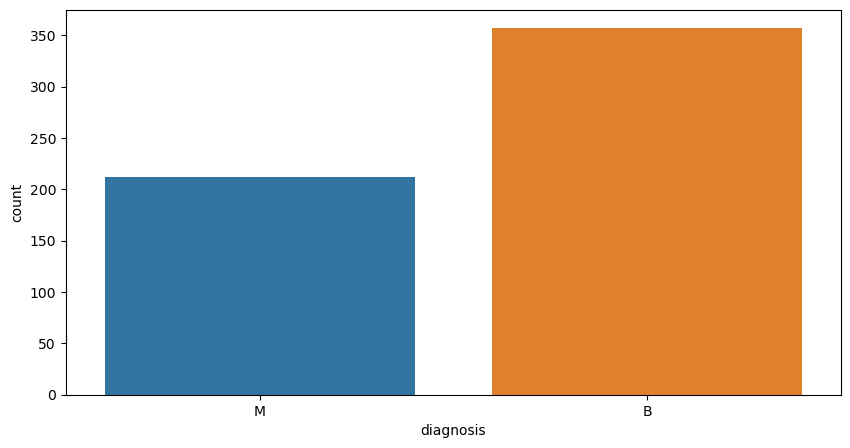

In [6]:
# visualize distribution of classes 
plt.figure(figsize=(10, 5))
sns.countplot(breast_cancer_dataset['diagnosis'])

# count number of observation in each class
benign, malignant = breast_cancer_dataset['diagnosis'].value_counts()
print('Number of cells labeled Benign: ', benign)
print('Number of cells labeled Malignant : ', malignant)
print('')
print('percentage of cells labeled Benign', round(benign / len(breast_cancer_dataset) * 100, 4), '%')
print('percentage of cells labeled Malignant', round(malignant / len(breast_cancer_dataset) * 100, 4), '%')

### 4_Extracting more information from your dataset to get more variables :- 

In [7]:
breast_cancer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### 5_Check the unique values of columns :-

In [8]:
for current_column in breast_cancer_dataset.columns :
    print(f"\n The number of unique Values in Column {current_column} : {breast_cancer_dataset[current_column].nunique()}")


 The number of unique Values in Column id : 569

 The number of unique Values in Column diagnosis : 2

 The number of unique Values in Column radius_mean : 456

 The number of unique Values in Column texture_mean : 479

 The number of unique Values in Column perimeter_mean : 522

 The number of unique Values in Column area_mean : 539

 The number of unique Values in Column smoothness_mean : 474

 The number of unique Values in Column compactness_mean : 537

 The number of unique Values in Column concavity_mean : 537

 The number of unique Values in Column concave points_mean : 542

 The number of unique Values in Column symmetry_mean : 432

 The number of unique Values in Column fractal_dimension_mean : 499

 The number of unique Values in Column radius_se : 540

 The number of unique Values in Column texture_se : 519

 The number of unique Values in Column perimeter_se : 533

 The number of unique Values in Column area_se : 528

 The number of unique Values in Column smoothness_se : 

### 5_Data Exploration & Analysis (EDA) : 

**Although our dataset has 30 columns excluding the id and the diagnosis columns, they are all in fact very closely related since they all contain information on the same 10 key attributes but only differ in terms of their perspectives (i.e., the mean, standard errors, and the mean of the three largest values denoted as "worst").**

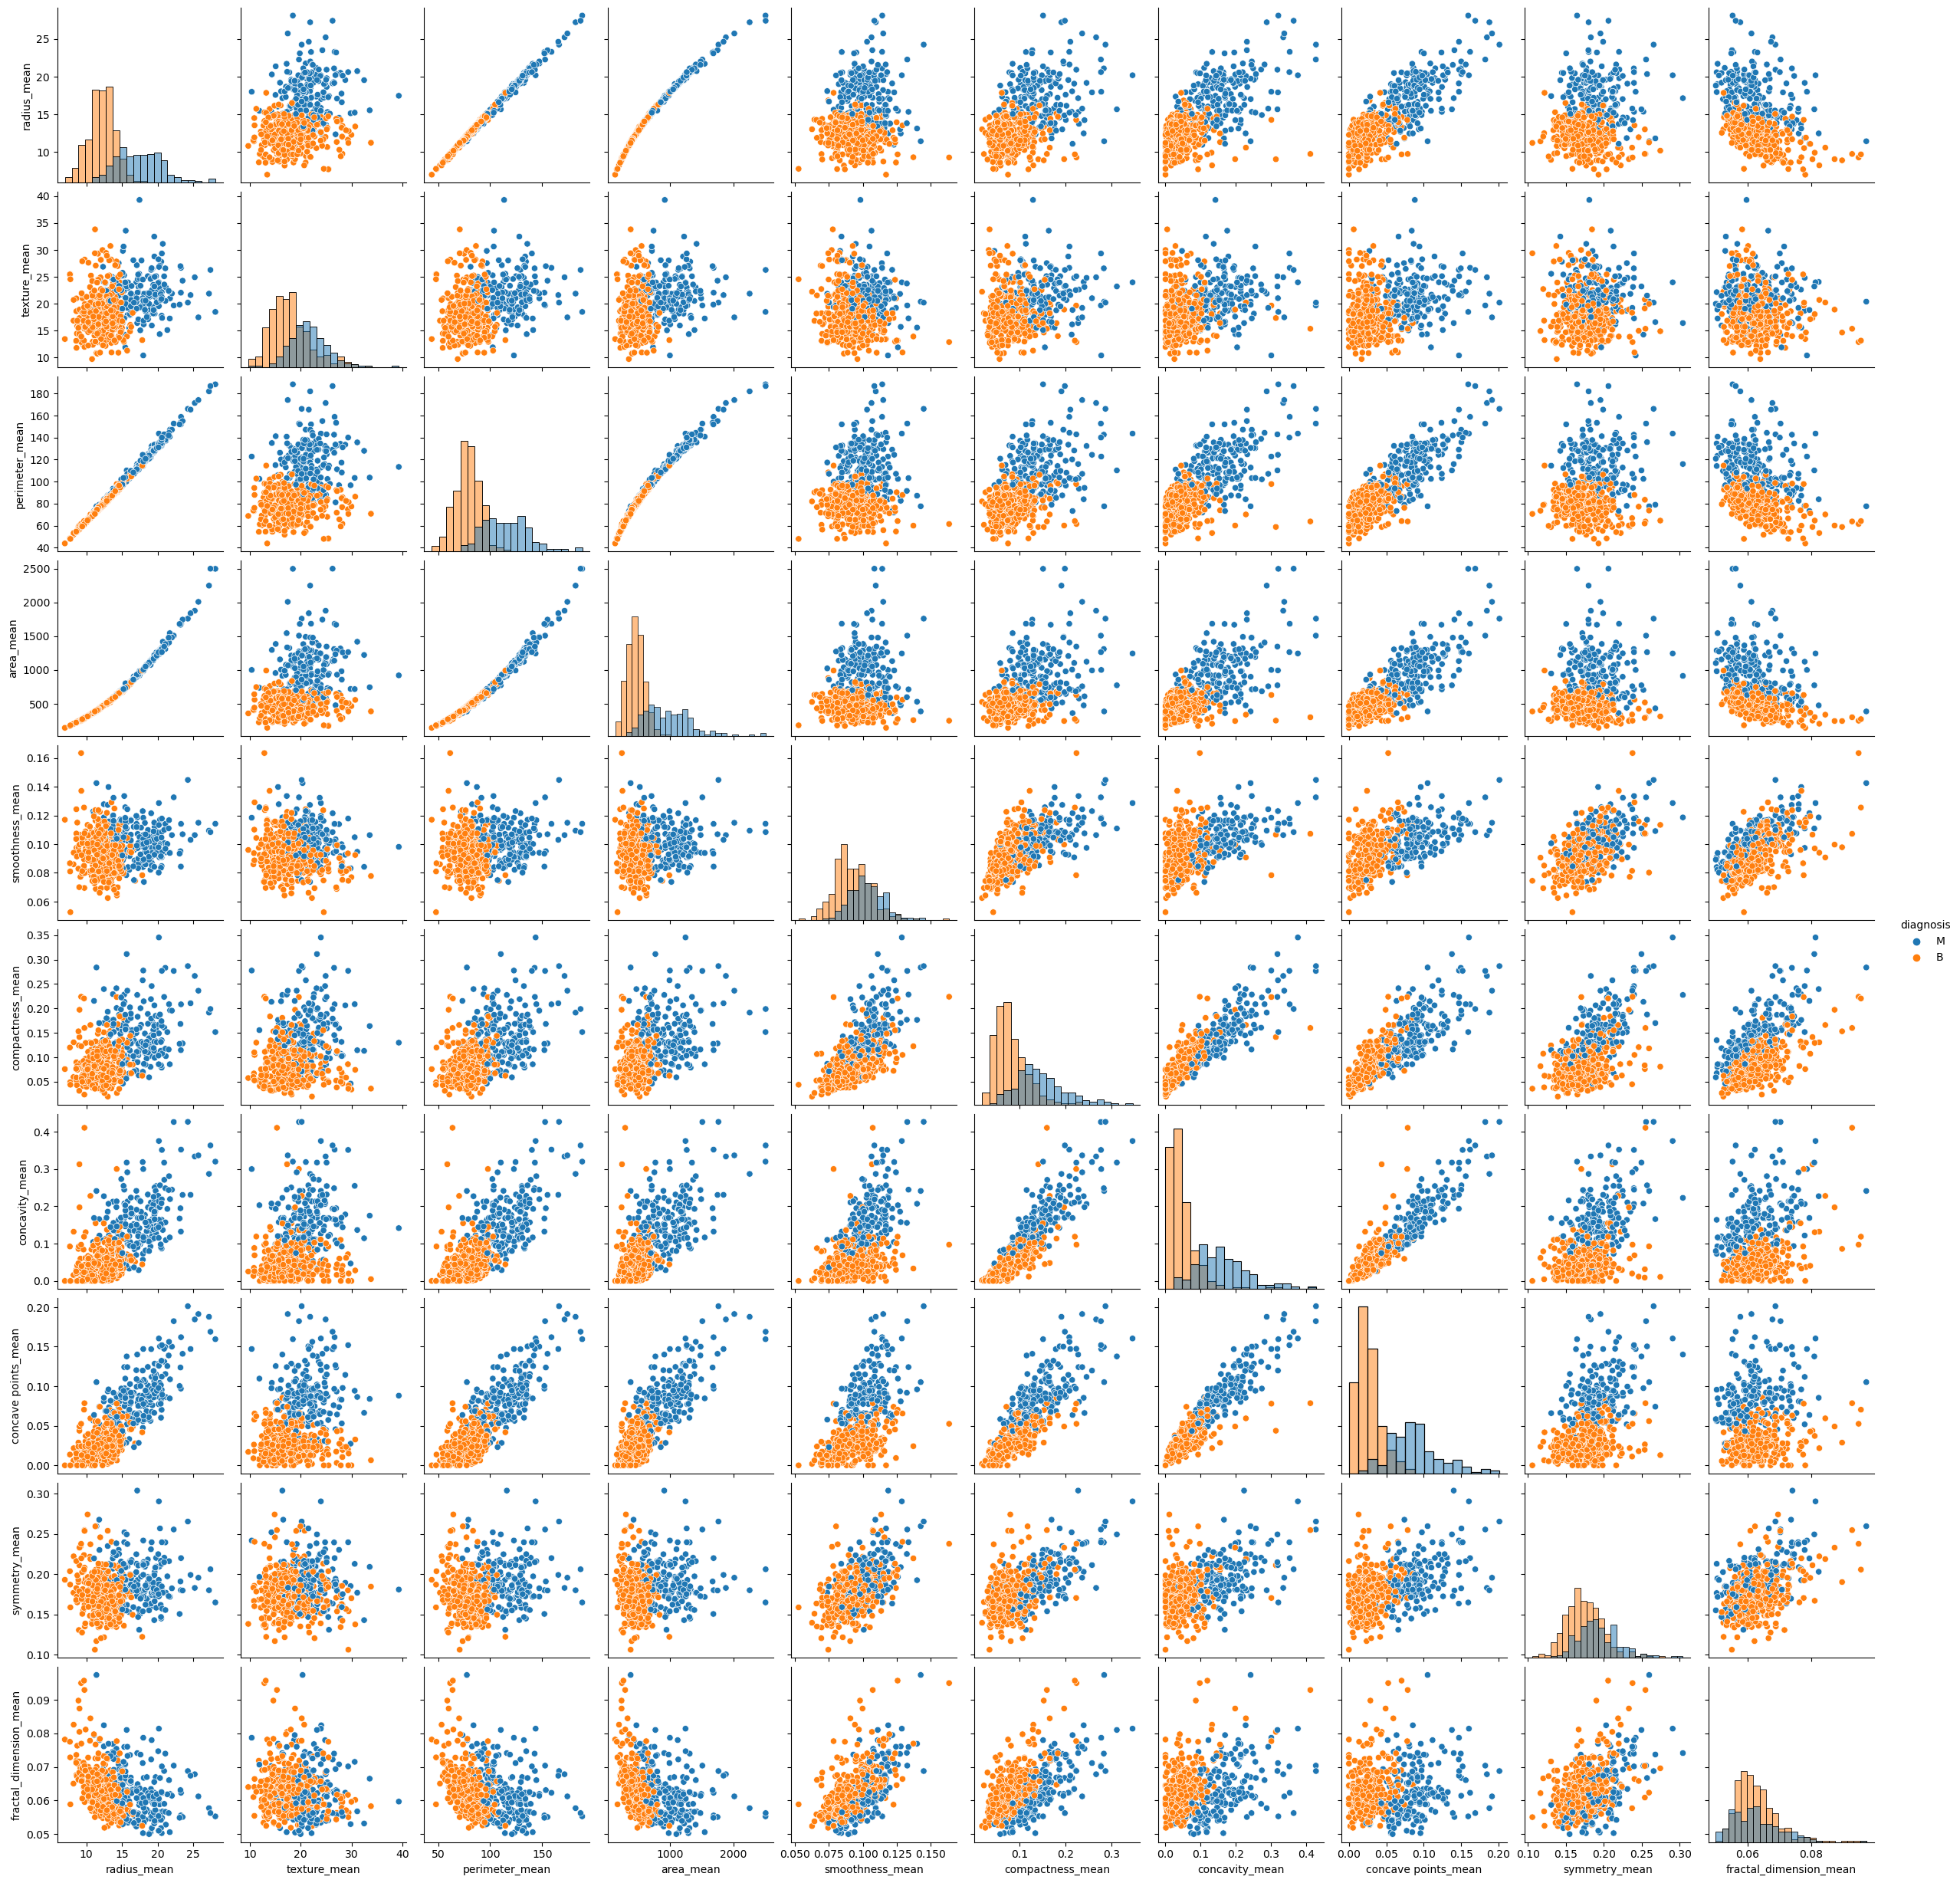

In [9]:
# generate a scatter plot matrix with the "mean" columns
cols = ['diagnosis',
        'radius_mean', 
        'texture_mean', 
        'perimeter_mean', 
        'area_mean', 
        'smoothness_mean', 
        'compactness_mean', 
        'concavity_mean',
        'concave points_mean', 
        'symmetry_mean', 
        'fractal_dimension_mean']

sns.pairplot(data=breast_cancer_dataset[cols], hue='diagnosis' , diag_kind="hist")

### checking the correlation between features :- 

C:\Users\Laptop\AppData\Local\Temp\ipykernel_13040\3211084499.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


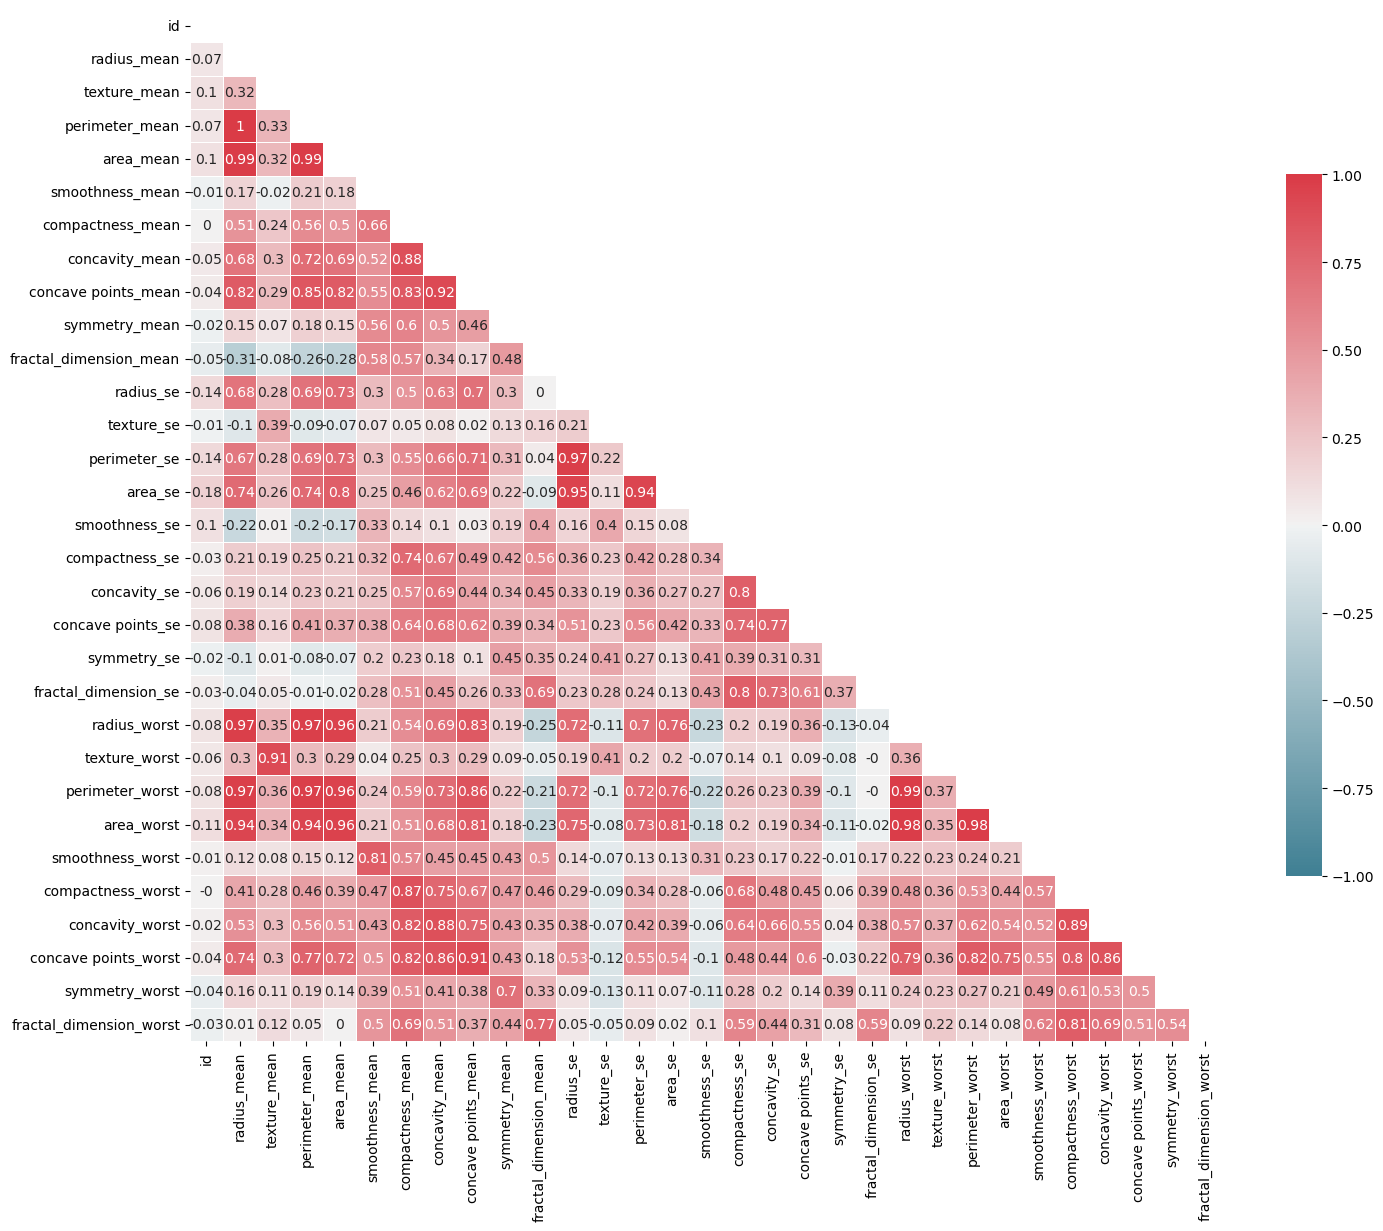

In [10]:
# Generate and visualize the correlation matrix
corr = breast_cancer_dataset.corr().round(2)

# Mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set figure size
f, ax = plt.subplots(figsize=(15, 15))

# Define custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()

(1)_In fact, each of the 10 key attributes displays very high (from 0.7 up to 0.97) correlations between its "mean" and "worst" columns. This is somewhat inevitable because the "worst" columns are essentially just a subset of the "mean" columns.

(2)_I think we should discard the "worst" and Some of mean such as perimeter_mean columns from our analysis and only focus on the "mean" columns.

(3)_ Similarly, it seems like there is multicollinearity between the attributes compactness, concavity, and concave points.I think compactness is an attribute name that is straightforward, so I will remove the other two attributes.

In [11]:
# first, drop all "worst" columns
cols = ['radius_worst', 
        'texture_worst', 
        'perimeter_worst', 
        'area_worst', 
        'smoothness_worst', 
        'compactness_worst', 
        'concavity_worst',
        'concave points_worst', 
        'symmetry_worst', 
        'fractal_dimension_worst']
breast_cancer_dataset = breast_cancer_dataset.drop(cols, axis=1)

# then, drop all columns related to the "perimeter" and "area" attributes
cols = ['perimeter_mean',
        'perimeter_se', 
        'area_mean', 
        'area_se']
breast_cancer_dataset = breast_cancer_dataset.drop(cols, axis=1)

# lastly, drop all columns related to the "concavity" and "concave points" attributes
cols = ['concavity_mean',
        'concavity_se', 
        'concave points_mean', 
        'concave points_se']
breast_cancer_dataset = breast_cancer_dataset.drop(cols, axis=1)

# verify remaining columns
breast_cancer_dataset.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se'],
      dtype='object')

C:\Users\Laptop\AppData\Local\Temp\ipykernel_13040\2286924408.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


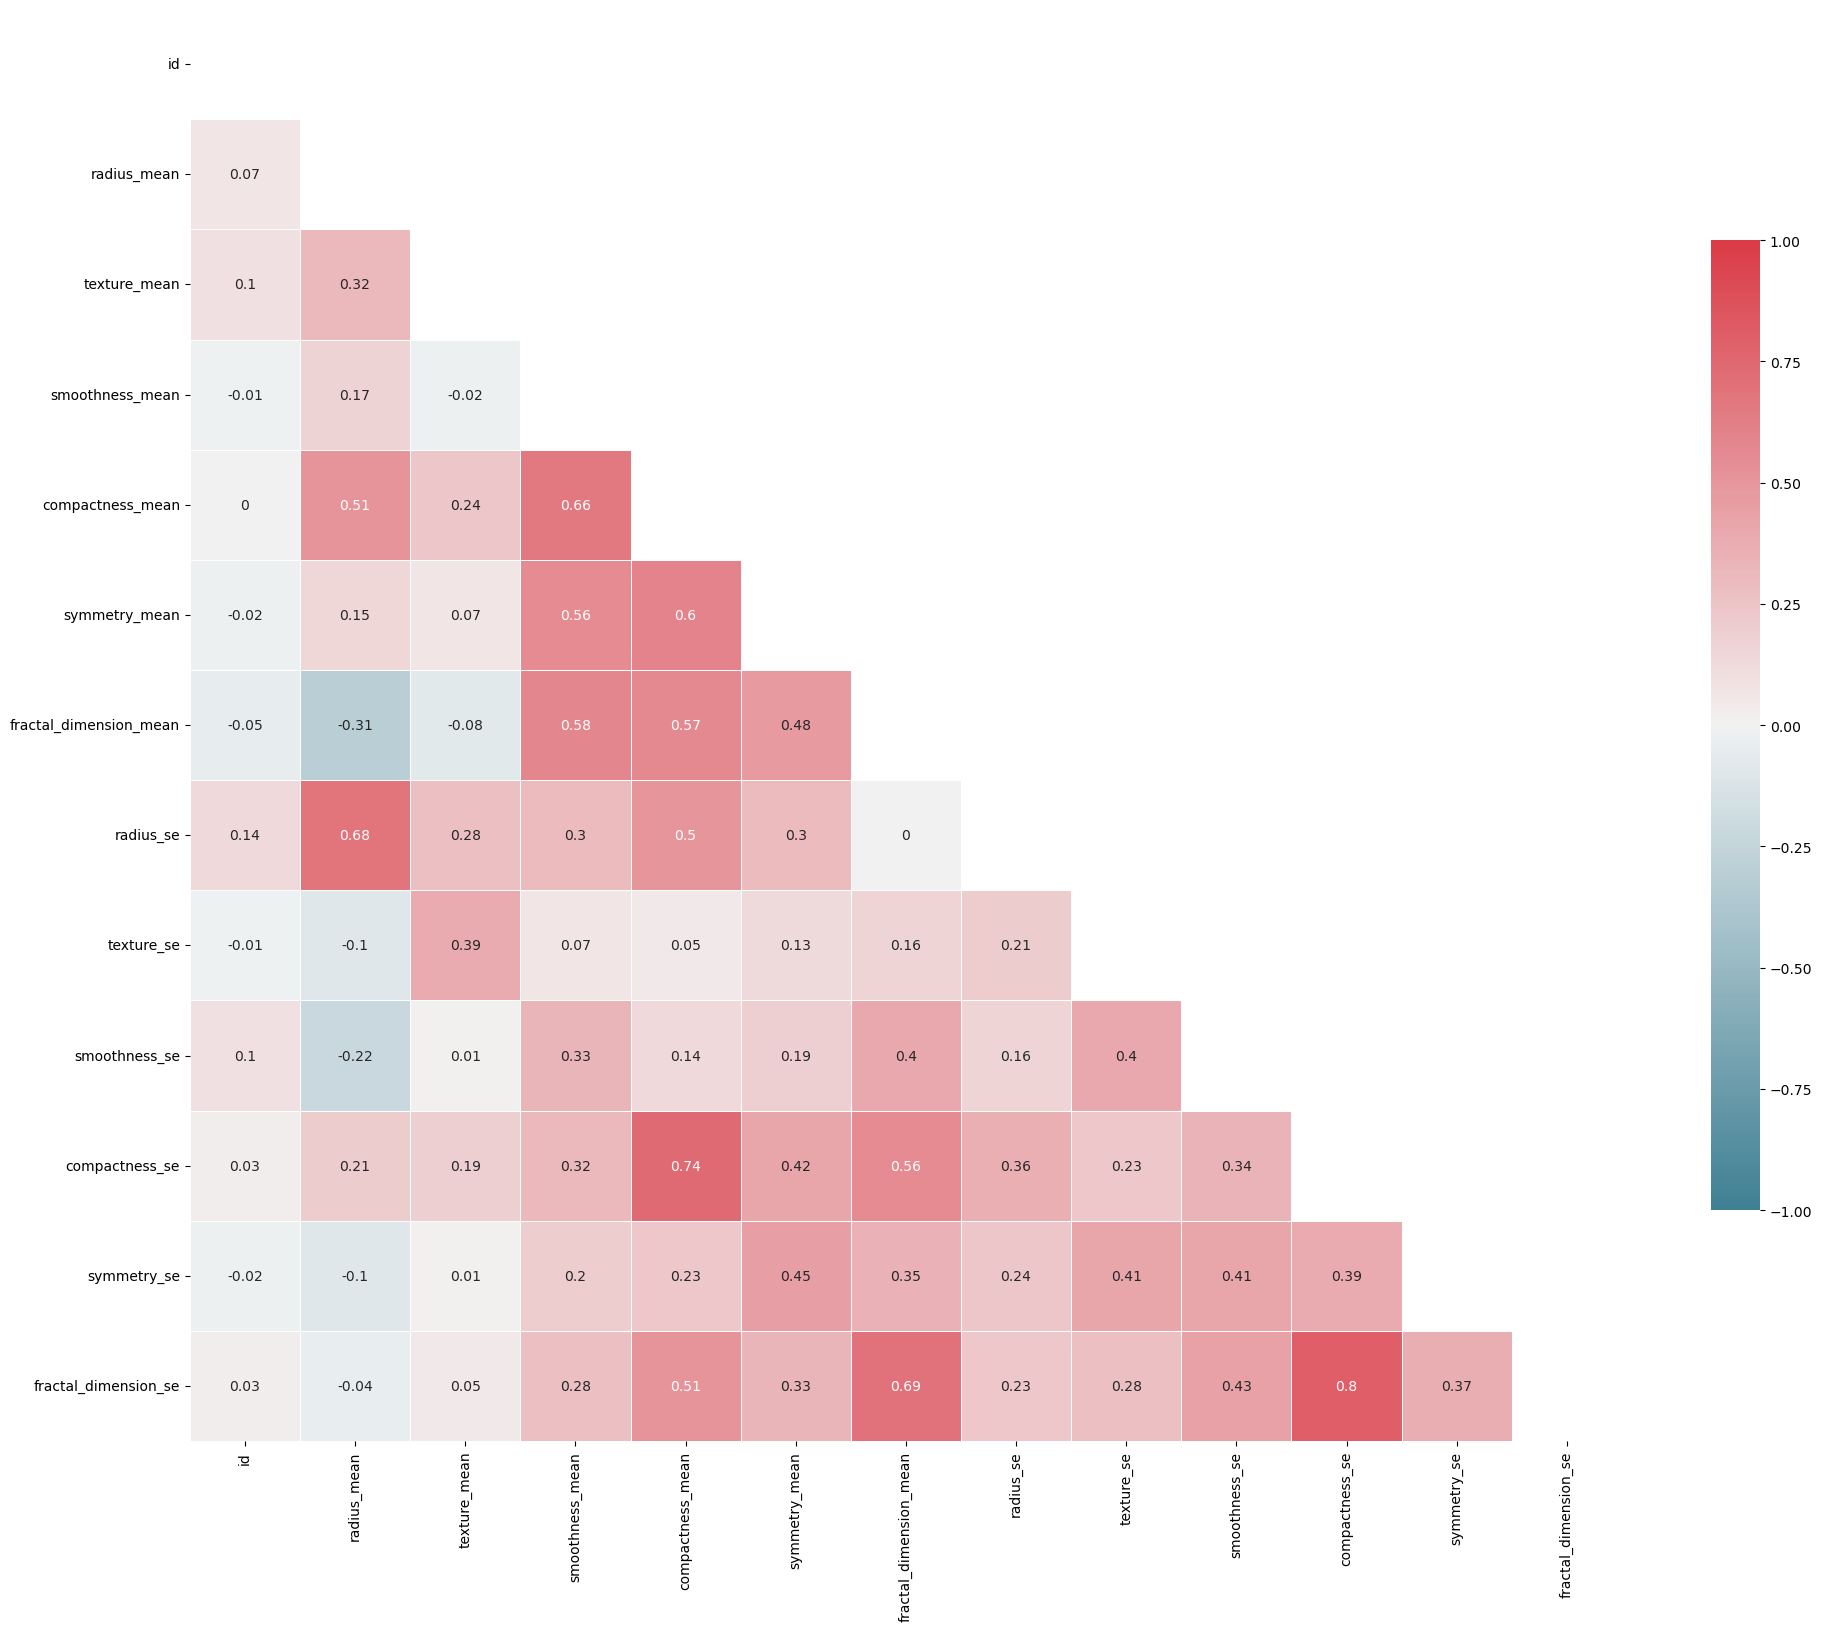

In [12]:
# Draw the heatmap again, with the new correlation matrix
corr = breast_cancer_dataset.corr().round(2)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.tight_layout()

## 6_Data Modelling :- 

**I will use KFold Cross Validation and check the accuracy of more than one classification model to know the best one of them for our data.**
#### _ types of classification mode i wil use : 
(1) LogisticRegression.

(2) SVC.

(3) RandomForestClassifier.

(4) KNeighborsClassifier.

### 1_ Splitting the data into Features and Target column. 

In [13]:
Features = breast_cancer_dataset.drop('diagnosis' , axis = 1)
target = breast_cancer_dataset.diagnosis

columns = Features.columns.to_list()
Features.shape, target.shape

((569, 13), (569,))

In [14]:
scaler = StandardScaler()
Features = scaler.fit_transform(Features)
Features

array([[-0.23640517,  1.09706398, -2.07333501, ...,  1.31686157,
         1.14875667,  0.90708308],
       [-0.23640344,  1.82982061, -0.35363241, ..., -0.69292627,
        -0.80545038, -0.09944374],
       [ 0.43174109,  1.57988811,  0.45618695, ...,  0.8149735 ,
         0.23703554,  0.2935594 ],
       ...,
       [-0.23572747,  0.70228425,  2.0455738 , ...,  0.66127727,
        -0.89141612,  0.03672674],
       [-0.23572517,  1.83834103,  2.33645719, ...,  2.01771639,
         0.32663363,  0.90405707],
       [-0.24240586, -1.80840125,  1.22179204, ..., -1.16351619,
         0.75282996, -0.382754  ]])

In [15]:
Features = pd.DataFrame(Features, columns = columns)
Features

id  radius_mean  texture_mean  smoothness_mean  compactness_mean  \
0   -0.236405     1.097064     -2.073335         1.568466          3.283515   
1   -0.236403     1.829821     -0.353632        -0.826962         -0.487072   
2    0.431741     1.579888      0.456187         0.942210          1.052926   
3    0.432121    -0.768909      0.253732         3.283553          3.402909   
4    0.432201     1.750297     -1.151816         0.280372          0.539340   
..        ...          ...           ...              ...               ...   
564 -0.235732     2.110995      0.721473         1.041842          0.219060   
565 -0.235730     1.704854      2.085134         0.102458         -0.017833   
566 -0.235727     0.702284      2.045574        -0.840484         -0.038680   
567 -0.235725     1.838341      2.336457         1.525767          3.272144   
568 -0.242406    -1.808401      1.221792        -3.112085         -1.150752   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
0         2.217515                2.255747   2.489734   -0.565265   
1         0.001392               -0.868652   0.499255   -0.876244   
2         0.939685               -0.398008   1.228676   -0.780083   
3         2.867383                4.910919   0.326373   -0.110409   
4        -0.009560               -0.562450   1.270543   -0.790244   
..             ...                     ...        ...         ...   
564      -0.312589               -0.931027   2.782080    0.071025   
565      -0.217664               -1.058611   1.300499    2.260938   
566      -0.809117               -0.895587   0.184892   -0.257371   
567       2.137194                1.043695   1.157935    0.686088   
568      -0.820070               -0.561032  -0.070279    0.383092   

     smoothness_se  compactness_se  symmetry_se  fractal_dimension_se  
0        -0.214002        1.316862     1.148757              0.907083  
1        -0.605351       -0.692926    -0.805450             -0.099444  
2        -0.297005        0.814974     0.237036              0.293559  
3         0.689702        2.744280     4.732680              2.047511  
4         1.483067       -0.048520    -0.361092              0.499328  
..             ...             ...          ...                   ...  
564       1.086384        0.191805    -1.138416              0.167980  
565      -0.424010       -0.069758    -0.189161             -0.490556  
566      -0.379342        0.661277    -0.891416              0.036727  
567      -0.173000        2.017716     0.326634              0.904057  
568       0.049342       -1.163516     0.752830             -0.382754  

[569 rows x 13 columns]

### 2_ Making function Get_score to get the score of our models :- 

In [16]:
def Get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

### 3_ making the folds and get the scores of every model :- 

In [17]:
folds = StratifiedKFold(n_splits = 10)

scores_logistic = []
scores_svm = []
scores_RF = []
scores_KNN = []

for train_index, test_index in folds.split(Features , target) : 
    X_train, X_test = Features.iloc[train_index], Features.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    #Evaluation of best scores(accuracy) for the logistic regression model 
    scores_logistic.append(Get_score(LogisticRegression(solver='liblinear',multi_class='ovr') , X_train , X_test , y_train , y_test))

    #Evaluation of best scores(accuracy) for the SVM model 
    scores_svm.append(Get_score(SVC(gamma='auto'), X_train, X_test, y_train, y_test))
    
    #Evaluation of best scores(accuracy) for the RF model
    scores_RF.append(Get_score(RandomForestClassifier(n_estimators=60, max_depth=100), X_train, X_test, y_train, y_test))
    
    #Evaluation of best scores(accuracy) for the KNN model 
    scores_KNN.append(Get_score(KNeighborsClassifier(n_neighbors = 5) , X_train, X_test, y_train, y_test))
    
#Converting the lists to numpy array to get th best score 
np_scores_logistic = np.asarray(scores_logistic)
np_scores_svm = np.asarray(scores_svm)
np_scores_RF = np.asarray(scores_RF)
np_scores_KNN = np.asarray(scores_KNN)

#Getting best score is the Average of all scores
best_score_of_logistic_regression_model = np_scores_logistic.mean()
best_score_of_SVM_model = np_scores_svm.mean()
best_score_RF_model = np_scores_RF.mean()
best_score_KNN_model = np_scores_KNN.mean()

C:\Users\Laptop\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Laptop\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

### 1_ scores and best score of logistic regresion model :- 

In [18]:
print(f'scres of Logistic regression Model : \n{scores_logistic}')

scres of Logistic regression Model : 
[0.9473684210526315, 0.8421052631578947, 0.9298245614035088, 0.9649122807017544, 0.9649122807017544, 0.9298245614035088, 0.9298245614035088, 0.9649122807017544, 0.9473684210526315, 0.9107142857142857]


In [19]:
print(f'Best score of Logistic regression Model: {best_score_of_logistic_regression_model*100} %')

Best score of Logistic regression Model: 93.31766917293234 %


### 2_ scores and best score of svm model :- 

In [20]:
print(f'scres of svm Model : \n{scores_svm}')

scres of svm Model : 
[0.9649122807017544, 0.8421052631578947, 0.9298245614035088, 0.9473684210526315, 0.9649122807017544, 0.9298245614035088, 0.9473684210526315, 0.9649122807017544, 0.8771929824561403, 0.9107142857142857]


In [21]:
print(f'Best score of svm Model: {best_score_of_SVM_model*100} %')

Best score of svm Model: 92.79135338345866 %


### 3_ scores and best score of RF model :- 

In [22]:
print(f'scres of RF Model : \n{scores_RF}')

scres of RF Model : 
[0.9473684210526315, 0.8596491228070176, 0.9122807017543859, 0.9298245614035088, 0.9649122807017544, 0.9473684210526315, 0.9473684210526315, 0.9649122807017544, 0.9473684210526315, 0.9464285714285714]


In [23]:
print(f'Best score of RF Model: {best_score_RF_model*100} %')

Best score of RF Model: 93.67481203007519 %


### 4_ scores and best score of KNN model :- 


In [24]:
print(f'scres of KNN Model : \n{scores_KNN}')

scres of KNN Model : 
[0.9473684210526315, 0.9122807017543859, 0.9473684210526315, 0.9649122807017544, 0.9473684210526315, 0.9122807017543859, 0.9122807017543859, 0.9473684210526315, 0.8245614035087719, 0.9285714285714286]


In [25]:
print(f'Best score of svm Model: {best_score_KNN_model*100} ')

Best score of svm Model: 92.44360902255639 


### **IMPORTANT NOTE : we noticed that the RF model is the best one of them and suitable for our data**

### 4_ model evaluation :-

In [26]:
# Create a RandomForestClassifier object with specified hyperparameters
rfc = RandomForestClassifier(n_estimators=60, max_depth=100 ,random_state=100)

# Train the model on the training data
rfc.fit(X_train, y_train)

# Make predictions on the test data using the trained model
y_pred = rfc.predict(X_test)
print(f'Best score of RF Model: {best_score_RF_model*100} %')
print(f"The Evaluation of RF model :  {accuracy_score(y_test , y_pred)*100} %") 

Best score of RF Model: 93.67481203007519 %
The Evaluation of RF model :  96.42857142857143 %
